<div style="text-align: right;"><h4>ФБ-21 Редько-Шпак Родислав</h4></div>
<h1><center><b>Лабораторна робота №6</b></center></h1>
<h3><center>З предмета "Засоби підготовки та аналізу даних"</center></h3>
<h5><b><center>Хід роботи:</center></b></h5>

====================================================================================

<h1><b>ЗАВДАННЯ №1</b></h1>

====================================================================================

In [1]:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Бібліотеки успішно імпортовані!")

Бібліотеки успішно імпортовані!


<h4>1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (y = kx + b) для подальшого аналізу результатів.</h4>

In [2]:
# згенеруємо набір даних (x, y) навколо прямої y = 3x + 6
# початкові параметри прямої
true_k = 3
true_b = 6

np.random.seed(26)  # сід для x
x = np.random.uniform(-10, 10, size=1000)  # x в діапазоні [-10, 10]

np.random.seed(26) # сід для шуму
noise = np.random.normal(0, 3, size=1000)  # додамо шум з нормального розподілу
y = true_k * x + true_b + noise  # y з початкової прямої + шум

<h4>2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок k^ та b^.</h4>
<h4>3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).</h4>

In [3]:
# Функція для знаходження оцінок k^ та b^ методом найменших квадратів

# Варіант 1 - безпосередньо, обчислюючи оцінки коефіцієнтів за формулам)
def least_squares_method_1(x, y):
    """
    Знаходить оцінки коефіцієнтів k^ та b^ методом найменших квадратів.

    Параметри:
    x (numpy.ndarray): Вхідні дані незалежної змінної.
    y (numpy.ndarray): Вхідні дані залежної змінної.

    Повертає:
    tuple: Оцінки коефіцієнтів k^ та b^.
    """
    # беремо середні значення x та y
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # рахуємо чисельник та знаменник для підрахунку k^
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean)**2)

    if denominator == 0:
        raise ValueError("Неможливо обчислити коефіцієнт k^, оскільки x є константою.")
    
    # k^ та b^ за формулою
    k_hat = numerator / denominator  
    b_hat = y_mean - k_hat * x_mean

    return k_hat, b_hat

# Варіант 2 - використовує numpy.linalg.lstsq, що виконує лінійну регресію з найменшими квадратами на основі матричних операцій.
def least_squares_method_2(x, y):
    # створення матриці A яка містить х та ствопець з 1
    A = np.vstack([x, np.ones(len(x))]).T

    # linalg.lstsq здійснює лінійну регресію з найменшими квадратами на основі цих матричних операцій
    k_hat, b_hat = np.linalg.lstsq(A, y, rcond=None)[0]
    return k_hat, b_hat

# обчислимо [k^ та b^] за допомогою методу МНК (прямим методом):
k_hat, b_hat = least_squares_method_1(x, y)

# обчислимо [k^ та b^] за допомогою методу МНК (використовуючи numpy.linalg.lstsq):
k_hat2, b_hat2 = least_squares_method_2(x, y)

# обчислимо [k^ та b^] через np.polyfit (степінь 1)
k_polyfit, b_polyfit = np.polyfit(x, y, 1)

print(f"Початкові параметри: k = {true_k}, b = {true_b}")
print()

# прямий метод МНК
error_k_direct = abs((k_hat - true_k) / true_k) * 100
error_b_direct = abs((b_hat - true_b) / true_b) * 100
print("Прямий метод МНК:")
print(f"=] k^ = {k_hat} (відносна похибка: {error_k_direct}%)")
print(f"=] b^ = {b_hat} (відносна похибка: {error_b_direct}%)")
print()

# МНК з через numpy.linalg.lstsq
error_k_lstsq = abs((k_hat2 - true_k) / true_k) * 100
error_b_lstsq = abs((b_hat2 - true_b) / true_b) * 100
print("МНК з використанням numpy.linalg.lstsq:")
print(f"=] k^ = {k_hat2} (відносна похибка: {error_k_lstsq}%)")
print(f"=] b^ = {b_hat2} (відносна похибка: {error_b_lstsq}%)")
print()

# np.polyfit
error_k_polyfit = abs((k_polyfit - true_k) / true_k) * 100
error_b_polyfit = abs((b_polyfit - true_b) / true_b) * 100
print("Метод np.polyfit:")
print(f"=] k^ = {k_polyfit} (відносна похибка: {error_k_polyfit}%)")
print(f"=] b^ = {b_polyfit} (відносна похибка: {error_b_polyfit}%)")

Початкові параметри: k = 3, b = 6

Прямий метод МНК:
=] k^ = 2.9994474086033147 (відносна похибка: 0.018419713222842894%)
=] b^ = 6.002991406566594 (відносна похибка: 0.049856776109905944%)

МНК з використанням numpy.linalg.lstsq:
=] k^ = 2.9994474086033174 (відносна похибка: 0.018419713222754076%)
=] b^ = 6.002991406566594 (відносна похибка: 0.049856776109905944%)

Метод np.polyfit:
=] k^ = 2.9994474086033165 (відносна похибка: 0.018419713222783685%)
=] b^ = 6.002991406566593 (відносна похибка: 0.04985677610987634%)


<h4>4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її.
Також знайдемо похибки MSE, MAE та R^2</h4>

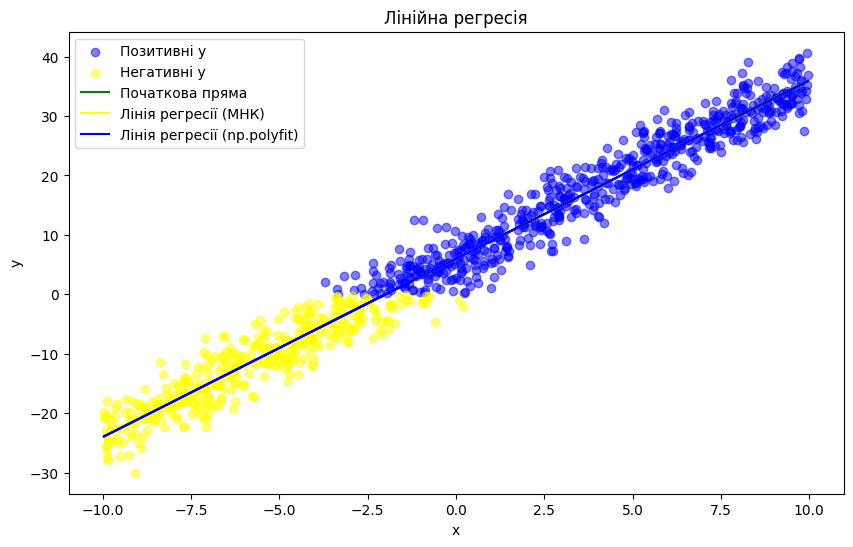


Похибки МНК (прямим методом):
=] MSE: 8.741300959758258 (2.87033%)
=] MAE: 2.341578554156707 (15.57012%)
=] R^2: 0.9712967333824971

Похибки МНК (numpy.linalg.lstsq):
=] MSE: 8.741300959758258 (2.87033%)
=] MAE: 2.341578554156707 (15.57012%)
=] R^2: 0.9712967333824971

Похибки np.polyfit:
=] MSE: 8.741300959758256 (2.87033%)
=] MAE: 2.341578554156707 (15.57012%)
=] R^2: 0.9712967333824971


In [4]:
# графік
plt.figure(figsize=(10, 6))

pos_mask = y >= 0
neg_mask = y < 0

plt.scatter(x[pos_mask], y[pos_mask], label="Позитивні y", color="blue", alpha=0.5)
plt.scatter(x[neg_mask], y[neg_mask], label="Негативні y", color="yellow", alpha=0.5)

plt.plot(x, true_k * x + true_b, label="Початкова пряма", color="green")
plt.plot(x, k_hat * x + b_hat, label="Лінія регресії (МНК)", color="yellow")
plt.plot(x, k_polyfit * x + b_polyfit, label="Лінія регресії (np.polyfit)", color="blue")

plt.title("Лінійна регресія")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

################################

# похибки мнк (для варіанту 1):
y_pred_mnk1 = k_hat * x + b_hat
mse_mnk1 = mean_squared_error(y, y_pred_mnk1)
mae_mnk1 = mean_absolute_error(y, y_pred_mnk1)
r2_mnk1 = r2_score(y, y_pred_mnk1)

print(f"\nПохибки МНК (прямим методом):")
print(f"=] MSE: {mse_mnk1} ({(mse_mnk1 / np.var(y)) * 100:.5f}%)")
print(f"=] MAE: {mae_mnk1} ({(mae_mnk1 / np.mean(np.abs(y - np.mean(y)))) * 100:.5f}%)")
print(f"=] R^2: {r2_mnk1}")

# похибки мнк (для варіанту 2):
y_pred_mnk2 = k_hat2 * x + b_hat2
mse_mnk2 = mean_squared_error(y, y_pred_mnk2)
mae_mnk2 = mean_absolute_error(y, y_pred_mnk2)
r2_mnk2 = r2_score(y, y_pred_mnk2)

print(f"\nПохибки МНК (numpy.linalg.lstsq):")
print(f"=] MSE: {mse_mnk2} ({(mse_mnk2 / np.var(y)) * 100:.5f}%)")
print(f"=] MAE: {mae_mnk2} ({(mae_mnk2 / np.mean(np.abs(y - np.mean(y)))) * 100:.5f}%)")
print(f"=] R^2: {r2_mnk2}")

# похибки np.polyfit
y_pred_polyfit = k_polyfit * x + b_polyfit
mse_polyfit = mean_squared_error(y, y_pred_polyfit)
mae_polyfit = mean_absolute_error(y, y_pred_polyfit)
r2_polyfit = r2_score(y, y_pred_polyfit)

print(f"\nПохибки np.polyfit:")
print(f"=] MSE: {mse_polyfit} ({(mse_polyfit / np.var(y)) * 100:.5f}%)")
print(f"=] MAE: {mae_polyfit} ({(mae_polyfit / np.mean(np.abs(y - np.mean(y)))) * 100:.5f}%)")
print(f"=] R^2: {r2_polyfit}")

====================================================================================

<h1><b>ЗАВДАННЯ №2</b></h1>

====================================================================================

<h4>1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок k^ та b^ (над k та b в завданні позначено ^).  Визначіть оптимальні вхідні параметри: learning_rate, n_iter.</h4>

In [5]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000, initial_params=None):
    """
    Знаходить оцінки коефіцієнтів k^ та b^ методом градієнтного спуску.

    Параметри:
    x (numpy.ndarray): Вхідні дані незалежної змінної.
    y (numpy.ndarray): Вхідні дані залежної змінної.
    learning_rate (float): Коефіцієнт навчання (розмір кроку).
    n_iter (int): Кількість ітерацій.
    initial_params (tuple або None): Початкові значення k^ та b^. Якщо None, ініціалізуються нулями.

    Повертає:
    tuple: Оцінки коефіцієнтів k^ та b^, історія значень MSE, MAE та R^2.
    """
    if len(x) == 0 or len(y) == 0:
        return None, None, None, None, None
    
    if initial_params is None:
        k_hat = 0  # Початкове наближення для k^
        b_hat = 0  # Початкове наближення для b^
    else:
        k_hat, b_hat = initial_params

    mse_history, mse_history2 = [], []  # Для збереження історії MSE
    mae_history, mae_history2 = [], []  # Для збереження історії MAE
    r2_history, r2_history2 = [], []   # Для збереження історії R^2

    for _ in range(n_iter):
        y_pred = k_hat * x + b_hat  # Обчислюємо поточні передбачення
        errors = y - y_pred

        # Обчислюємо часткові похідні функції втрат MSE
        dk = -2 * np.mean(x * errors)
        db = -2 * np.mean(errors)

        # Оновлюємо параметри за правилом градієнтного спуску
        k_hat = k_hat - learning_rate * dk
        b_hat = b_hat - learning_rate * db

        # 1 спосіб похибки (через методи sklearn)
        mse = mean_squared_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)

        mse_history.append(mse)
        mae_history.append(mae)
        r2_history.append(r2)

        # 2 спосіб похибки (через нампай)
        mse_2 = np.mean(errors ** 2)
        mae_2 = np.mean(np.abs(errors))
        r2_2 = 1 - np.sum(errors ** 2) / np.sum((y - np.mean(y)) ** 2)

        mse_history2.append(mse_2)
        mae_history2.append(mae_2)
        r2_history2.append(r2_2)

    return k_hat, b_hat, mse_history, mae_history, r2_history, mse_history2, mae_history2, r2_history2 

<h4>2. Додайте отриману лінію регресії на загальний графік.</h4>

Метод градієнтного спуску:
=] k^ = 2.9994474086456764 (відносна похибка: 0.02%)
=] b^ = 6.00299139436638 (відносна похибка: 0.05%)

Похибки градієнтного спуску (sklearn):
=] MSE: 8.741300959758258 (2.87%)
=] MAE: 2.3415785541088145 (15.57%)
=] R^2: 0.9712967333824971

Похибки градієнтного спуску (numpy):
=] MSE: 8.741300959758258 (2.87%)
=] MAE: 2.3415785541088145 (15.57%)
=] R^2: 0.9712967333824971


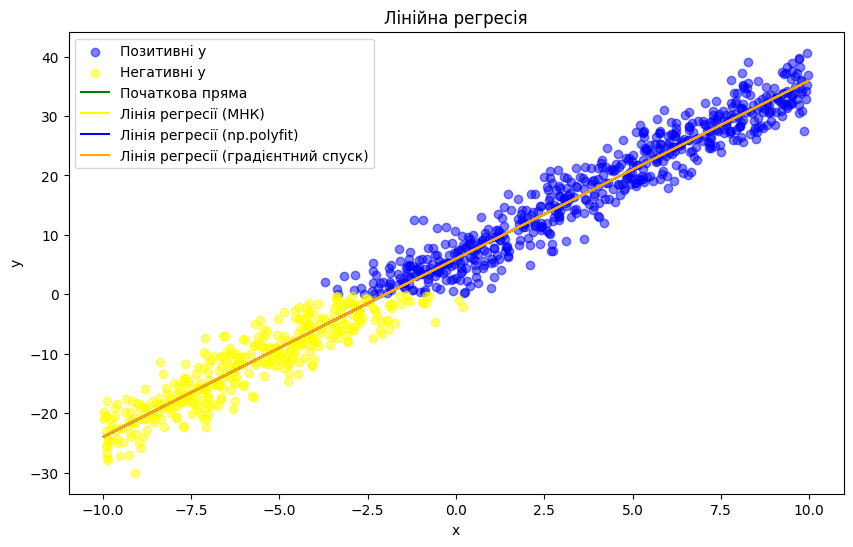

In [6]:
# оптимальні вхідні параметри learning_rate, n_iter
learning_rate = 0.001
n_iter = 10000

# обчислимо [k^ та b^] через градієнтний спуск 1
k_hat_gd, b_hat_gd, mse_history, mae_history, r2_history, mse_history2, mae_history2, r2_history2 = gradient_descent(x, y, learning_rate, n_iter)
# відносні похибки для градієнтного спуску
error_k_gd = abs((k_hat_gd - true_k) / true_k) * 100
error_b_gd = abs((b_hat_gd - true_b) / true_b) * 100
print("Метод градієнтного спуску:")
print(f"=] k^ = {k_hat_gd} (відносна похибка: {error_k_gd:.2f}%)")
print(f"=] b^ = {b_hat_gd} (відносна похибка: {error_b_gd:.2f}%)")


y_pred_gd = k_hat_gd * x + b_hat_gd

# похибки градієнтний спуск (1 спосіб)
mse_gd = mse_history[-1]
mae_gd = mae_history[-1]
r2_gd = r2_history[-1]

print(f"\nПохибки градієнтного спуску (sklearn):")
print(f"=] MSE: {mse_gd} ({(mse_gd / np.var(y)) * 100:.2f}%)")
print(f"=] MAE: {mae_gd} ({(mae_gd / np.mean(np.abs(y - np.mean(y)))) * 100:.2f}%)")
print(f"=] R^2: {r2_gd}")

# похибки градієнтний спуск (2 спосіб)
mse_gd2 = mse_history2[-1]
mae_gd2 = mae_history2[-1]
r2_gd2 = r2_history2[-1]

print(f"\nПохибки градієнтного спуску (numpy):")
print(f"=] MSE: {mse_gd2} ({(mse_gd2 / np.var(y)) * 100:.2f}%)")
print(f"=] MAE: {mae_gd2} ({(mae_gd2 / np.mean(np.abs(y - np.mean(y)))) * 100:.2f}%)")
print(f"=] R^2: {r2_gd2}")

# графік
plt.figure(figsize=(10, 6))

plt.scatter(x[pos_mask], y[pos_mask], label="Позитивні y", color="blue", alpha=0.5)
plt.scatter(x[neg_mask], y[neg_mask], label="Негативні y", color="yellow", alpha=0.5)

plt.plot(x, true_k * x + true_b, label="Початкова пряма", color="green")
plt.plot(x, k_hat * x + b_hat, label="Лінія регресії (МНК)", color="yellow")
plt.plot(x, k_polyfit * x + b_polyfit, label="Лінія регресії (np.polyfit)", color="blue")
plt.plot(x, k_hat_gd * x + b_hat_gd, label="Лінія регресії (градієнтний спуск)", color="orange")

plt.title("Лінійна регресія")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

<h4>3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки.</h4>

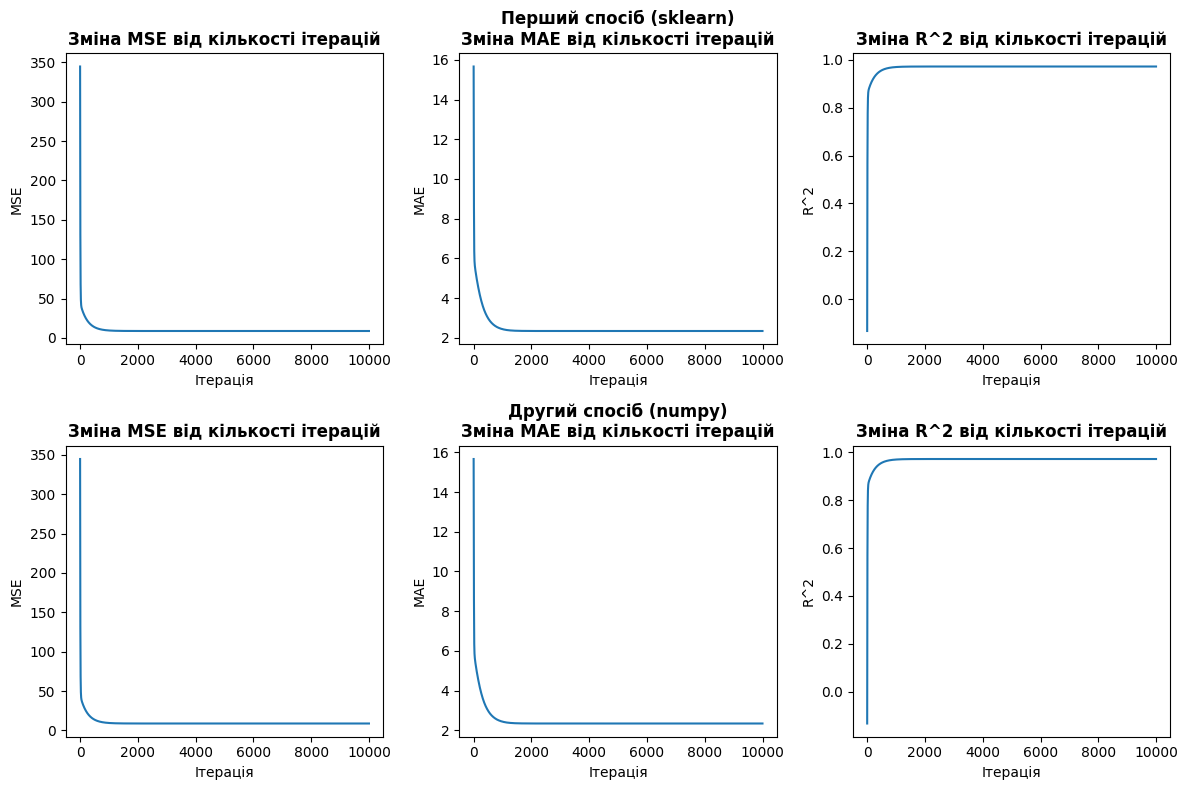

In [7]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(range(n_iter), mse_history)
plt.title("Зміна MSE від кількості ітерацій", fontweight='bold')
plt.xlabel("Ітерація")
plt.ylabel("MSE")

plt.subplot(2, 3, 2)
plt.plot(range(n_iter), mae_history)
plt.title("Перший спосіб (sklearn)\nЗміна MAE від кількості ітерацій", fontweight='bold')
plt.xlabel("Ітерація")
plt.ylabel("MAE")

plt.subplot(2, 3, 3)
plt.plot(range(n_iter), r2_history)
plt.title("Зміна R^2 від кількості ітерацій", fontweight='bold')
plt.xlabel("Ітерація")
plt.ylabel("R^2")

plt.subplot(2, 3, 4)
plt.plot(range(n_iter), mse_history2)
plt.title("Зміна MSE від кількості ітерацій", fontweight='bold')
plt.xlabel("Ітерація")
plt.ylabel("MSE")

plt.subplot(2, 3, 5)
plt.plot(range(n_iter), mae_history2)
plt.title("Другий спосіб (numpy)\nЗміна MAE від кількості ітерацій", fontweight='bold')
plt.xlabel("Ітерація")
plt.ylabel("MAE")

plt.subplot(2, 3, 6)
plt.plot(range(n_iter), r2_history2)
plt.title("Зміна R^2 від кількості ітерацій", fontweight='bold')
plt.xlabel("Ітерація")
plt.ylabel("R^2")

plt.tight_layout()
plt.show()

<h4>4. Порівняйте отримані результати з результатами попереднього завдання. Зробив також перехресну перевірку.<h4>

In [8]:
# перехресна перевірка
kf = KFold(n_splits=20, shuffle=True, random_state=42)

# юзання векторизованих операцій та функцій з бібліотеки sklearn
mse_scores = cross_val_score(LinearRegression(), x.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=kf)
mae_scores = cross_val_score(LinearRegression(), x.reshape(-1, 1), y, scoring='neg_mean_absolute_error', cv=kf)
r2_scores = cross_val_score(LinearRegression(), x.reshape(-1, 1), y, scoring='r2', cv=kf)

# середні значення похибок після перехресної перевірки
mean_mse = -np.mean(mse_scores)
mean_mae = -np.mean(mae_scores)
mean_r2 = np.mean(r2_scores)

# Початкові параметри та обчислені значення
table_data = [
    ["Початкові параметри", f"k = {true_k}", f"b = {true_b}"],
    ["Обчислення через МНК (прямим методом)", f"k^ = {k_hat}", f"{error_k_direct}%", 
     f"b^ = {b_hat}", f"{error_b_direct}%"],
    ["Обчислення через МНК (numpy.linalg.lstsq)", f"k^ = {k_hat2}", f"{error_k_lstsq}%", 
     f"b^ = {b_hat2}", f"{error_b_lstsq}%"],
    ["Обчислення через np.polyfit", f"k^ = {k_polyfit}", f"{error_k_polyfit}%", 
     f"b^ = {b_polyfit}", f"{error_b_polyfit}%"],
    ["Обчислення через градієнтний спуск", f"k^ = {k_hat_gd}", f"{error_k_gd}%", 
     f"b^ = {b_hat_gd}", f"{error_b_gd}%"]
]

print("Початкові параметри та обчислені значення:")
print(tabulate(table_data, headers=["Метод", "k", "k (відносна похибка)", "b", "b (відносна похибка)"], tablefmt="fancy_grid"))
print("\n")

# Похибки
error_table = [
    ["Похибки МНК (прямим методом)", f"{mse_mnk1} ({(mse_mnk1 / np.var(y)) * 100:}%)",
     f"{mae_mnk1} ({(mae_mnk1 / np.mean(np.abs(y - np.mean(y)))) * 100:}%)",
     f"{r2_mnk1}"],
    ["Похибки МНК (numpy.linalg.lstsq)", f"{mse_mnk2} ({(mse_mnk2 / np.var(y)) * 100:}%)",
     f"{mae_mnk2} ({(mae_mnk2 / np.mean(np.abs(y - np.mean(y)))) * 100:}%)",
     f"{r2_mnk2}"],
    ["Похибки np.polyfit", f"{mse_polyfit} ({(mse_polyfit / np.var(y)) * 100:}%)",
     f"{mae_polyfit} ({(mae_polyfit / np.mean(np.abs(y - np.mean(y)))) * 100:}%)",
     f"{r2_polyfit}"],
    ["Похибки градієнтного спуску (sklearn)", f"{mse_gd} ({(mse_gd / np.var(y)) * 100:}%)",
     f"{mae_gd} ({(mae_gd / np.mean(np.abs(y - np.mean(y)))) * 100:}%)",
     f"{r2_gd}"],
    ["Похибки градієнтного спуску (numpy)", f"{mse_gd2} ({(mse_gd2 / np.var(y)) * 100:}%)",
     f"{mae_gd2} ({(mae_gd2 / np.mean(np.abs(y - np.mean(y)))) * 100:}%)",
     f"{r2_gd2}"],
    ["Перехресна перевірка", f"{mean_mse} ({(mean_mse / np.var(y)) * 100}%)",
     f"{mean_mae} ({(mean_mae / np.mean(np.abs(y - np.mean(y)))) * 100}%)",
     f"{mean_r2}"]
]

print("Похибки різних методів:")
print(tabulate(error_table, headers=["Метод", "MSE", "MAE", "R^2"], tablefmt="fancy_grid"))
print("\n")

Початкові параметри та обчислені значення:
╒═══════════════════════════════════════════╤═════════════════════════╤════════════════════════╤════════════════════════╤════════════════════════╕
│ Метод                                     │ k                       │ k (відносна похибка)   │ b                      │ b (відносна похибка)   │
╞═══════════════════════════════════════════╪═════════════════════════╪════════════════════════╪════════════════════════╪════════════════════════╡
│ Початкові параметри                       │ k = 3                   │ b = 6                  │                        │                        │
├───────────────────────────────────────────┼─────────────────────────┼────────────────────────┼────────────────────────┼────────────────────────┤
│ Обчислення через МНК (прямим методом)     │ k^ = 2.9994474086033147 │ 0.018419713222842894%  │ b^ = 6.002991406566594 │ 0.049856776109905944%  │
├───────────────────────────────────────────┼─────────────────────────┼────